Na apresentação 5, resolva o exemplo 1 com o método FE.

Calcule a matriz Jacobiana e seus autovalores em cada etapa e verifique os possíveis erros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward_euler_1d(f, u_0, t_n, h):
    u_n = np.zeros(t_n)

    for i, u in enumerate(u_n):

        if i == 0:
            u += u_0
        else:
            u += u_n[i-1] + h*t_n[i]

    return (t_n, u_n)

In [3]:
u1 = 1
u2 = 0
u3 = 0
k1 = 0.04
k2 = 1e4
k3 = 3e7
init_time = 0

In [4]:
def solution_reactions(u1, u2, u3, k1, k2, k3, init_time, final_time, h):

    n_steps = int((final_time-init_time)/h)
    array_t_n = np.linspace(init_time, final_time, num = n_steps)

    u1_n = [u1]
    u2_n = [u2]
    u3_n = [u3]

    for i in range(len(array_t_n)-1):

        J = np.array([[-k1, k2*u3, k2*u2],
                      [k1, -k2*u3-2*k3*u2, -k2*u2],
                      [0, 2*k3*u2, 0]])

        eigenvalues, _ = np.linalg.eig(J)
        min_lambda = eigenvalues.min()
        max_lambda = eigenvalues.max()

        if (max_lambda > 5.0e-16):
            print("Erro no auto valor:", max_lambda)

        h_opt = 2/abs(min_lambda)
        if h_opt < h:
            print("Erro no h:", h, ", ", h_opt)

        f1 = -k1*u1 + k2*u2*u3
        f2 = k1*u1 - k2*u2*u3 - k3*(u2)**2
        f3 = k3*(u2)**2

        u1 = u1 + h*f1
        u2 = u2 + h*f2
        u3 = u3 + h*f3

        u1_n.append(u1)
        u2_n.append(u2)
        u3_n.append(u3)

    array_u1_n = np.array(u1_n)
    array_u2_n = np.array(u2_n)
    array_u3_n = np.array(u3_n)

    return (array_t_n, array_u1_n, array_u2_n, array_u3_n)

In [6]:
final_time = 1000
h = 0.0001
solution = solution_reactions(u1, u2, u3, k1, k2, k3, init_time, final_time, h)

Streaming output truncated to the last 5000 lines.
Erro no auto valor: 2.211554320886511e-15
Erro no auto valor: 8.529371904131364e-16
Erro no auto valor: 1.344697414534671e-15
Erro no auto valor: 1.868523341423938e-15
Erro no auto valor: 1.1546361119534721e-15
Erro no auto valor: 1.4135905216622444e-15
Erro no auto valor: 7.474434719973496e-16
Erro no auto valor: 5.134508320765859e-16
Erro no auto valor: 9.636731957394801e-16
Erro no auto valor: 7.156064681253758e-16
Erro no auto valor: 1.15485223770392e-15
Erro no auto valor: 2.0579557485115804e-15
Erro no auto valor: 5.924029848483961e-16
Erro no auto valor: 1.048787936719039e-15
Erro no auto valor: 7.157463212059014e-16
Erro no auto valor: 1.1433475185769568e-15
Erro no auto valor: 1.2315164486060778e-15
Erro no auto valor: 1.6446481924207719e-15
Erro no auto valor: 2.0628636162266494e-15
Erro no auto valor: 1.671407974927785e-15
Erro no auto valor: 8.880280713519876e-16
Erro no auto valor: 1.2919242973054128e-15
Erro no auto valor

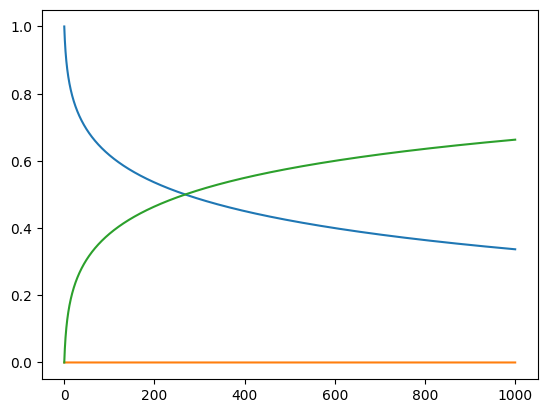

In [7]:
plt.plot(solution[0], solution[1])
plt.plot(solution[0], solution[2])
plt.plot(solution[0], solution[3])